In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PRÁTICA 1

Inspecione as primeiras linhas e obtenha informacoes gerais sobre o dataset, como tipos de dados e valores ausentes. Em seguida calcule a distribui ̧cao de Notas por Categoria, use groupby para agrupar os dados por uma vari ́avel categ ́orica de seu interesse e calcule a media e o desvio padr ̃ao das notas dos alunos. Compare as Categorias criando uma comparacao entre as medias das notas, ordenando o resultado para identificar quais grupos possuem melhor desempenho medio.


In [6]:
#leitura
student_df = pd.read_csv('StudentPerformanceFactors.csv')

#teste
print(student_df)

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                     

In [7]:
print("Primeiras linhas do dataset:")
print(student_df.head())

Primeiras linhas do dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teache

In [8]:
print("\nInformações gerais do dataset:")
print(student_df.info())


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence  

In [9]:
print("\nQuantidade de valores ausentes por coluna:")
print(student_df.isnull().sum())


Quantidade de valores ausentes por coluna:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [10]:
coluna_escolhida = 'Physical_Activity'

# Agrupar por categoria, calcular e ordenar a média e desvio padrão das notas
desempenho = student_df.groupby(coluna_escolhida)['Exam_Score'].agg(['mean', 'std']).reset_index()
desempenho_ornadado = desempenho.sort_values(by='mean', ascending=False)

print(f"\nDesempenho médio das notas de acordo com {coluna_escolhida}:")
print(desempenho_ornadado)


Desempenho médio das notas de acordo com Physical_Activity:
   Physical_Activity       mean       std
6                  6  68.093750  3.753359
5                  5  67.603878  4.062824
0                  0  67.521739  4.048260
4                  4  67.313016  3.717868
3                  3  67.196071  3.748645
2                  2  67.185003  4.157220
1                  1  66.969121  4.122701


# PRÁTICA 2

Faça uma correlação entre fatores e desempenho. Para isso, agrupe os dados por uma variável categórica, como “Tipo de Curso” ou “Horário de Estudo”, e analise como essas variáveis influenciam as notas dos alunos. Utilize o método agg para obter múltiplas estatísticas (média, mediana e contagem de alunos). Visualize esses resultados com gráficos, como box plots ou gráficos de barras, para evidenciar as diferenças entre os grupos.

Crie um filtro para encontrar grupos de alunos que atendam a determinadas condições (ex.: alunos com média superior a um valor específico e em uma categoria específica). Utilize o método filter para identificar grupos que atendam a uma condição personalizada (ex.: cursos com mais de 20 alunos que possuam média de desempenho superior a uma determinada nota).

In [11]:
# Carregar o dataset
student_df = pd.read_csv('StudentPerformanceFactors.csv')

In [12]:
coluna_escolhida = 'Hours_Studied'

# Agrupar os dados pela variável categórica e calcular múltiplas estatísticas
grupo_estatisticas = student_df.groupby(coluna_escolhida)['Exam_Score'].agg(['mean', 'median', 'count']).reset_index()


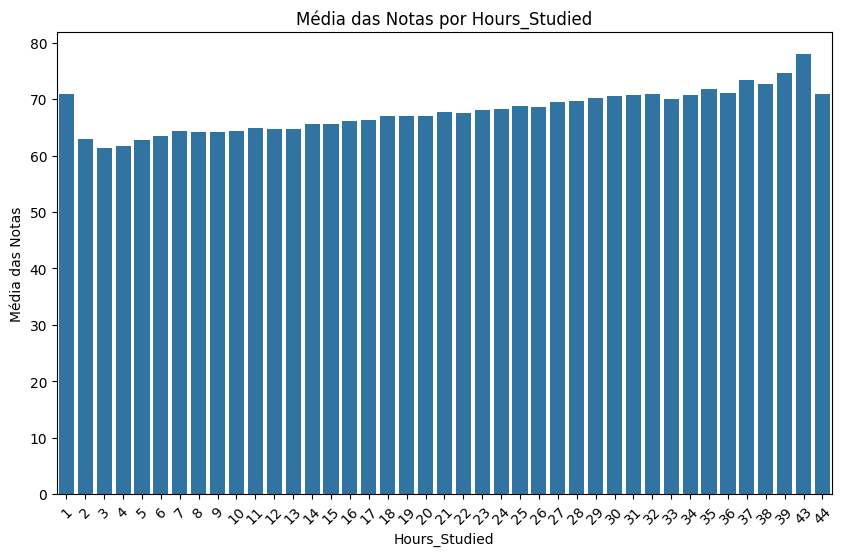

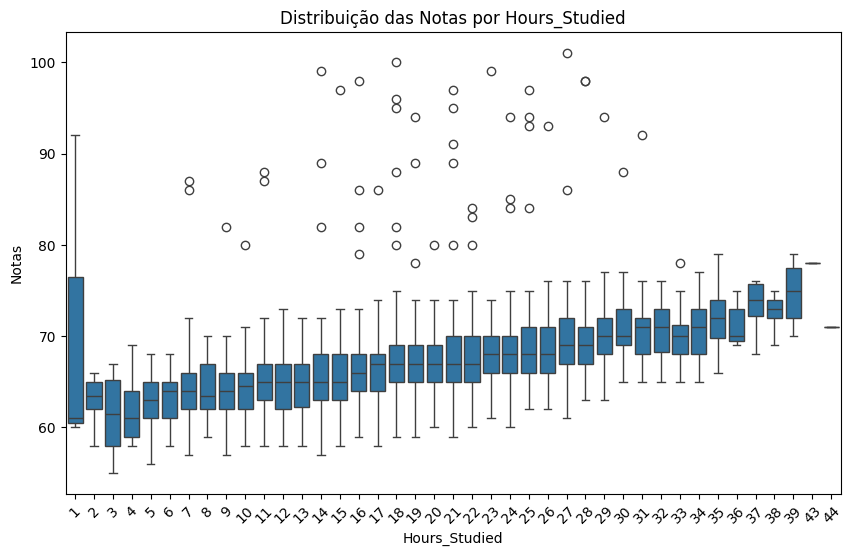

In [13]:
# Gráfico com a média das notas por categoria
plt.figure(figsize=(10, 6))
sns.barplot(data=grupo_estatisticas, x=coluna_escolhida, y='mean')
plt.title(f'Média das Notas por {coluna_escolhida}')
plt.xlabel(coluna_escolhida)
plt.ylabel('Média das Notas')
plt.xticks(rotation=45)
plt.show()

# Gráfico com a distribuição das notas em cada categoria
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df, x=coluna_escolhida, y='Exam_Score')
plt.title(f'Distribuição das Notas por {coluna_escolhida}')
plt.xlabel(coluna_escolhida)
plt.ylabel('Notas')
plt.xticks(rotation=45)
plt.show()

In [14]:
media_minima = 60
quantidade_minima = 10

filtro_grupos = grupo_estatisticas[(grupo_estatisticas['mean'] > media_minima) & (grupo_estatisticas['count'] > quantidade_minima)]
print("\nGrupos que atendem às condições específicas:")
print(filtro_grupos)


Grupos que atendem às condições específicas:
    Hours_Studied       mean  median  count
2               3  61.333333    61.5     12
3               4  61.647059    61.0     17
4               5  62.857143    63.0     21
5               6  63.470588    64.0     17
6               7  64.352941    64.0     51
7               8  64.155172    63.5     58
8               9  64.162791    64.0     86
9              10  64.393617    64.5     94
10             11  64.979452    65.0    146
11             12  64.765625    65.0    192
12             13  64.724771    65.0    218
13             14  65.576208    65.0    269
14             15  65.590476    65.0    315
15             16  66.182336    66.0    351
16             17  66.328084    67.0    381
17             18  67.042394    67.0    401
18             19  66.959184    67.0    441
19             20  66.950538    67.0    465
20             21  67.682135    67.0    431
21             22  67.480100    67.0    402
22             23  68.180049  

# PRÁTICA 4

Utilize o método apply para calcular uma métrica personalizada sobre os grupos. Por exemplo, crie uma função que classifique os alunos em diferentes níveis de desempenho (ex.: "Alto", "Médio", "Baixo") com base na média de notas de cada grupo e aplique-a aos dados.

Gere um relatório consolidado com gráficos e tabelas que resumam as principais descobertas da análise. Inclua, pelo menos, os seguintes itens:

* Comparações de médias entre grupos.
* Grupos que mais se destacam em termos de desempenho.
* Análise dos principais fatores que impactam o desempenho (ex.: Tipo de Curso, Gênero, Horário de Estudo).
* Use visualizações de dados, como gráficos de barras ou boxplots, para dar suporte às conclusões. (Explore a biblioteca Seaborn).


In [15]:
# Carregar o dataset
student_df = pd.read_csv('StudentPerformanceFactors.csv')

In [16]:
coluna_escolhida = 'Gender'

# Função personalizada para classificar níveis de desempenho com base na média de notas
def classificar_desempenho(media):
    if media >= 80:
        return "Alto"
    elif media >= 60:
        return "Médio"
    else:
        return "Baixo"

# Agrupar por categoria, calcular e classificar a média das notas de acordo com o desempenho
grupo_estatisticas = student_df.groupby(coluna_escolhida)['Exam_Score'].agg(['mean', 'count']).reset_index()
grupo_estatisticas['Desempenho'] = grupo_estatisticas['mean'].apply(classificar_desempenho)

print("Classificação de Desempenho por Categoria:")
print(grupo_estatisticas)

Classificação de Desempenho por Categoria:
   Gender       mean  count Desempenho
0  Female  67.244898   2793      Médio
1    Male  67.228894   3814      Médio


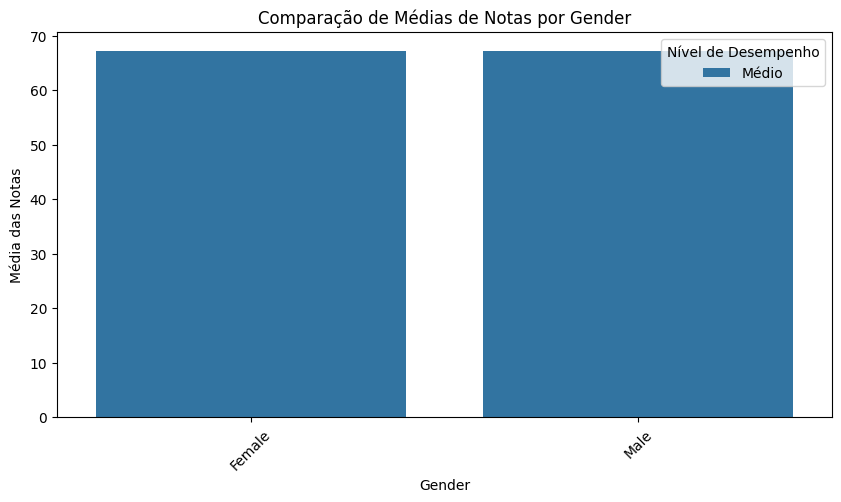

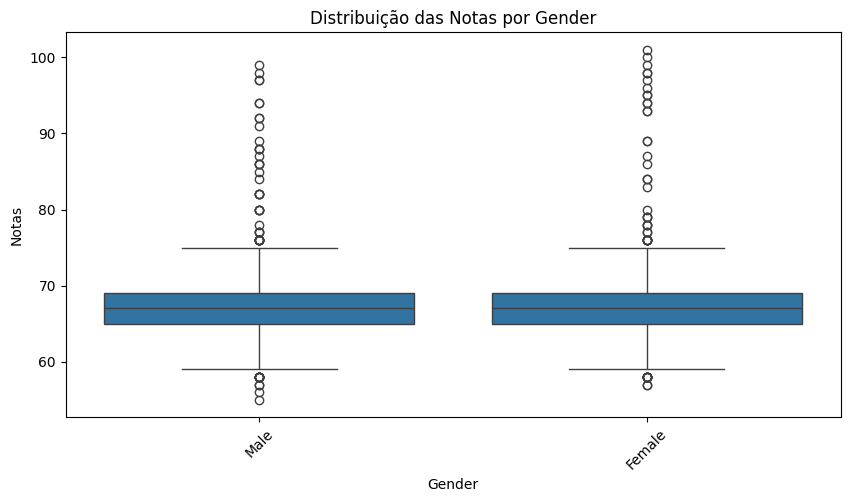

In [17]:
# Gráfico 1: Comparação de médias entre grupos
plt.figure(figsize=(10, 5))
sns.barplot(data=grupo_estatisticas, x=coluna_escolhida, y='mean', hue='Desempenho')
plt.title(f'Comparação de Médias de Notas por {coluna_escolhida}')
plt.xlabel(coluna_escolhida)
plt.ylabel('Média das Notas')
plt.xticks(rotation=45)
plt.legend(title='Nível de Desempenho')
plt.show()

# Gráfico 2: Boxplot para distribuição das notas por categoria
plt.figure(figsize=(10, 5))
sns.boxplot(data=student_df, x=coluna_escolhida, y='Exam_Score')
plt.title(f'Distribuição das Notas por {coluna_escolhida}')
plt.xlabel(coluna_escolhida)
plt.ylabel('Notas')
plt.xticks(rotation=45)
plt.show()


Grupos que se destacam em termos de desempenho (Alto Desempenho):
Empty DataFrame
Columns: [Gender, mean, count, Desempenho]
Index: []

Desempenho por Gênero:
   Gender       mean  median  count
0  Female  67.244898    67.0   2793
1    Male  67.228894    67.0   3814


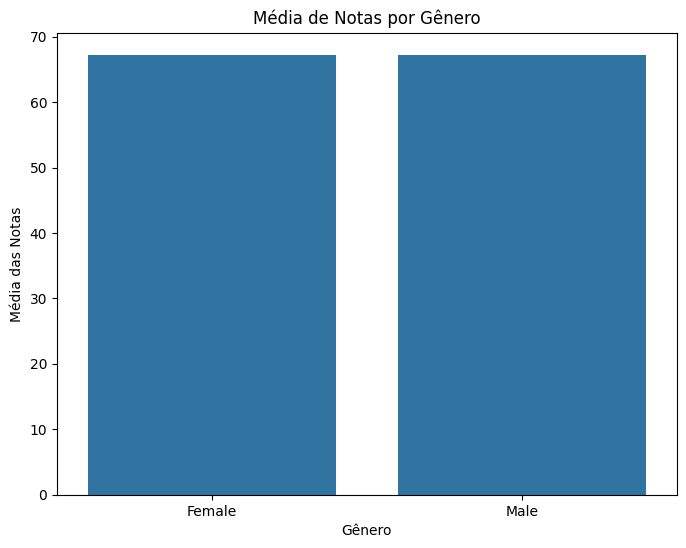


Desempenho por Acesso à internet:
  Internet_Access       mean  median  count
0              No  66.535070    66.0    499
1             Yes  67.292895    67.0   6108


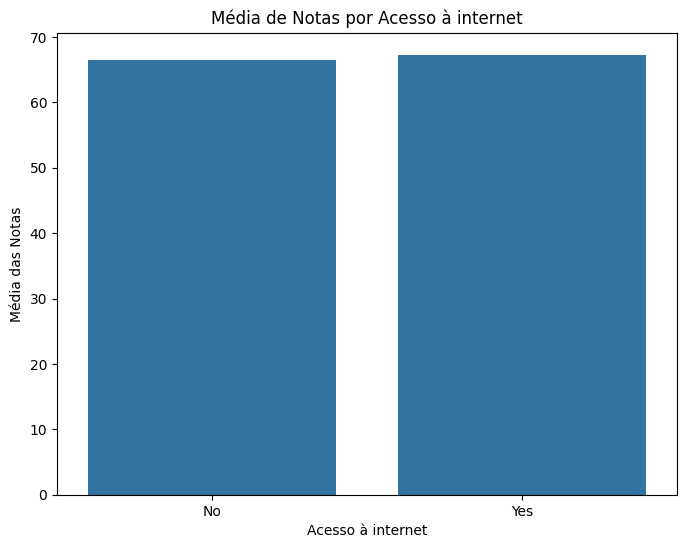

In [20]:
# Identificar o grupo de maior desempenho
grupo_destacado = grupo_estatisticas[grupo_estatisticas['Desempenho'] == 'Alto']
print("\nGrupos que se destacam em termos de desempenho (Alto Desempenho):")
print(grupo_destacado)

# Análise de fatores impactantes
# Exemplo: Agrupar por 'Gênero' e calcular média e contagem
if 'Gender' in student_df.columns:
    genero_estatisticas = student_df.groupby('Gender')['Exam_Score'].agg(['mean', 'median', 'count']).reset_index()
    print("\nDesempenho por Gênero:")
    print(genero_estatisticas)

    # Visualização do desempenho por gênero
    plt.figure(figsize=(8, 6))
    sns.barplot(data=genero_estatisticas, x='Gender', y='mean')
    plt.title('Média de Notas por Gênero')
    plt.xlabel('Gênero')
    plt.ylabel('Média das Notas')
    plt.show()
else:
    print("\nA coluna 'Gênero' não está disponível no dataset.")

if 'Internet_Access' in student_df.columns:
    internet_estatisticas = student_df.groupby('Internet_Access')['Exam_Score'].agg(['mean', 'median', 'count']).reset_index()
    print("\nDesempenho por Acesso à internet:")
    print(internet_estatisticas)

    # Visualização do desempenho por gênero
    plt.figure(figsize=(8, 6))
    sns.barplot(data=internet_estatisticas, x='Internet_Access', y='mean')
    plt.title('Média de Notas por Acesso à internet')
    plt.xlabel('Acesso à internet')
    plt.ylabel('Média das Notas')
    plt.show()
else:
    print("\nA coluna 'Acesso à internet' não está disponível no dataset.")

## Relatório

### 1. Comparação das médias entre os grupos

Média feminina: 67.24
Média masculina: 67.23

Ambos os gêneros apresentam desempenho médio similar. Isso indica uma consistência entre os grupos, sem evidências de que um gênero tenha desempenho superior ao outro.

### 2. Impacto do Acesso à Internet no Desempenho

Ao avaliar o desempenho médio com base no acesso à internet, temos os seguintes dados:

Sem acesso à internet: média de 66.54
Com acesso à internet: média de 67.29

Essa diferença de cerca de 0.75 pontos indica que o acesso à internet pode estar associado a um leve aumento no desempenho médio. Essa variação, embora pequena, sugere que o acesso à internet pode proporcionar algumas vantagens aos alunos, possivelmente por facilitar o acesso a materiais complementares, recursos de estudo online e um ambiente mais propício à pesquisa.

### Conclusão

Desempenho por Gênero: Não há uma diferença substancial entre os gêneros, sugerindo que o desempenho escolar está equilibrado entre homens e mulheres.

Desempenho e Acesso à Internet: Alunos com acesso à internet apresentam uma média de desempenho ligeiramente superior, o que pode apontar para uma leve influência positiva do acesso a recursos online. No entanto, como a diferença é pequena, pode ser importante investigar se existem outros fatores associados ao uso da internet que possam contribuir para essa pequena vantagem.

Ausência de Grupos de Alto Desempenho: O conjunto de dados não apresentou nenhum grupo com "Alto Desempenho", o que pode indicar que os critérios para essa classificação estão altos ou que há uma distribuição concentrada de desempenho em níveis médios.